# Football Prediction - Regression Analysis

## 1. Defining the Question

### a) Specifying the Question


> You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below. A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training). You have two possible approaches (as shown below) given the datasets that will be provided



Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

**Approach 1: Polynomial approach**

What to train given:

*   Rank of home team
*   Rank of away team
*   Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

**Approach 2: Logistic approach**

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### b) Defining the Metric for Success


Using Polynomial regression, the Root Mean Squared Error will be used to measure the performace of the model.

The prediction of model using logistic regression model will be measured using the accuracy score

### c) Understanding the context 

As a data analyst at Mchezo Ltd, the following task is required of you: Make a prediction of a game between team 1 and team 2 , based on who's home and who's away and on whether or not the game is friendly.

A more detailed explanation and history of the rankings is available here: [link](https://en.wikipedia.org/wiki/FIFA_World_Rankings)

An explanation of the ranking procedure is available here: [link](https://www.fifa.com/fifa-world-ranking/procedure/men)

**Dataset Columns**

Some features are available on the FIFA ranking page [Link](https://www.fifa.com/fifa-world-ranking/ranking-table/men/)



### d) Recording the Experimental Design

*   Perform your EDA
*   Perform any necessary feature engineering
*   Check of multicollinearity
*   Build the model
*   Cross-validate the model
*   Compute RMSE
*   Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
*   Perform appropriate regressions on the data including your justification
*   Challenge your solution by providing insights on how you can make improvements.

### e) Data Relevance

## 2. Reading the Data

In [0]:
# Import Libraries

# Analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix

# Other libraries
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Loading the Datasets

# Fifa dataset
fifa = pd.read_csv('fifa_ranking.csv')

# results dataset
results = pd.read_csv('results.csv')

## 3. Checking the Data

In [195]:
# Determining the no. of records in our dataset
print('Number of record in fifa dataset: ' + str(fifa.shape[0]))
print('Number of record in result dataset: ' + str(results.shape[0]))

Number of record in fifa dataset: 57793
Number of record in result dataset: 40839


In [196]:
# Previewing the top of our dataset
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [197]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [198]:
# Previewing the bottom of our dataset
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [199]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [200]:
col_names = fifa.dtypes[fifa.dtypes != "object"].index 
col_names

Index(['rank', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted'],
      dtype='object')

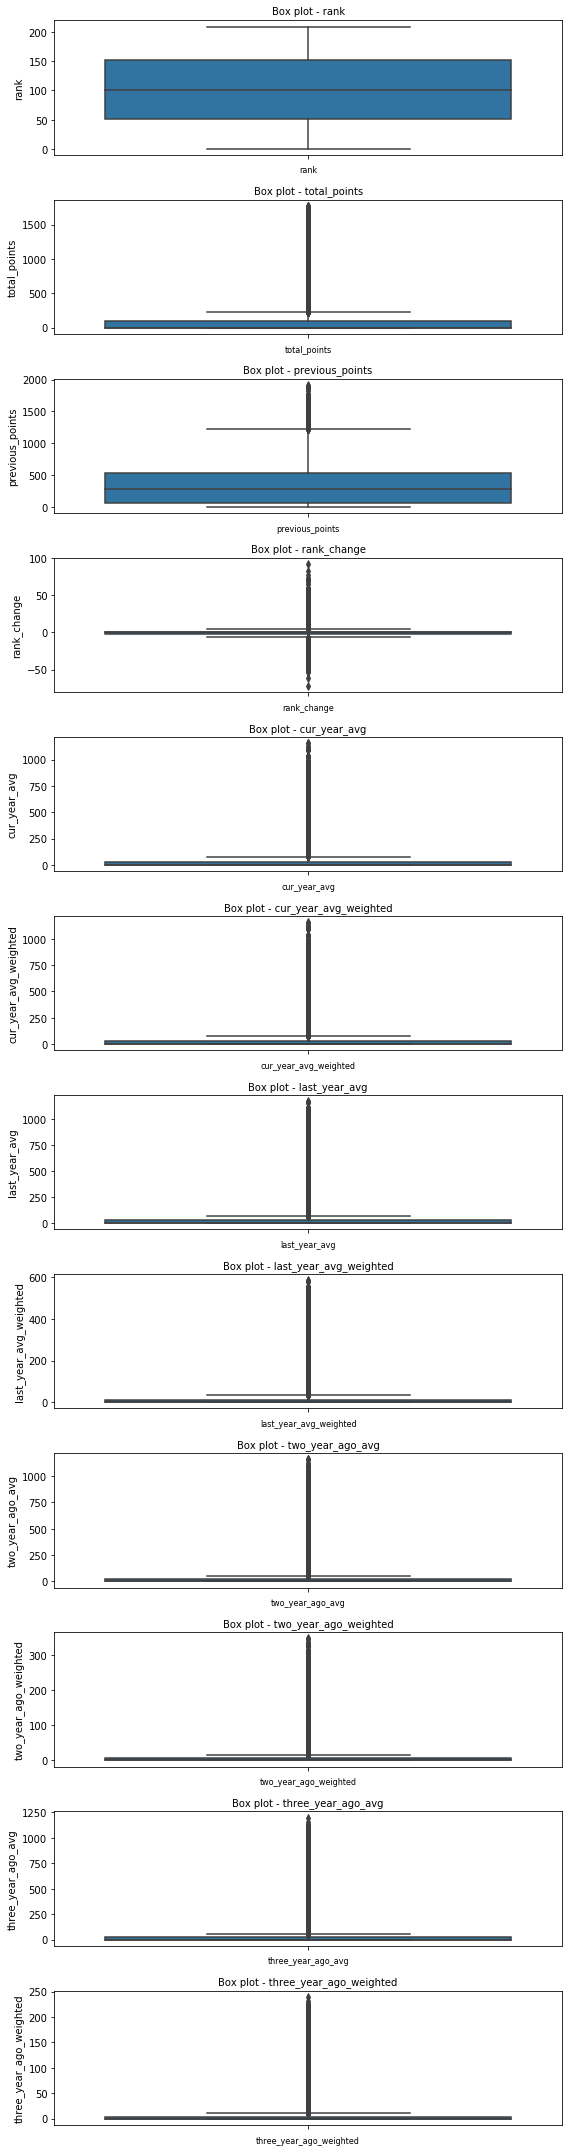

In [201]:
# Checking for Outliers
# Fifa dataset
fig, ax = plt.subplots(len(col_names), figsize=(8,30))
for i, col_val in enumerate(col_names):
    sns.boxplot(y=fifa[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.tight_layout()
plt.show()

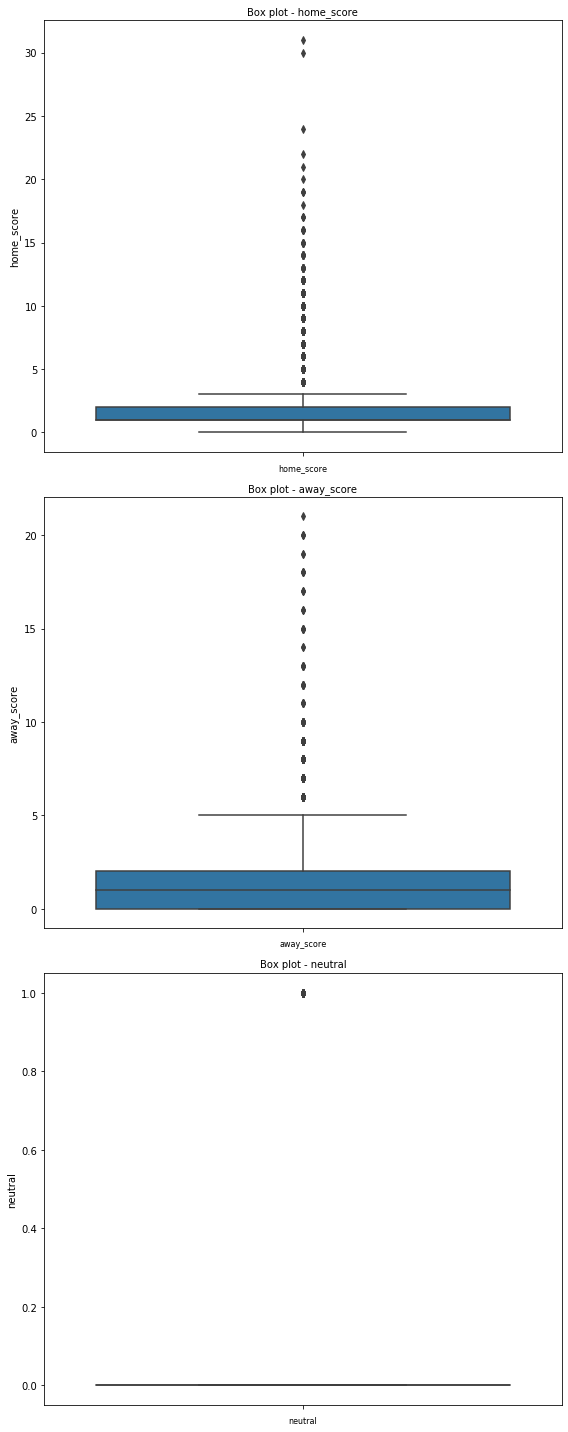

In [202]:
# Boxplots for Results dataset
col_names = results.dtypes[results.dtypes != "object"].index 
fig, ax = plt.subplots(len(col_names), figsize=(8,20))
for i, col_val in enumerate(col_names):
    sns.boxplot(y=results[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.tight_layout()
plt.show()

In [203]:
# Checking for Anomalies
# Check for duplicated rows
print('Fifa data duplicates : ', fifa.duplicated().any())
print('Results data duplicates : ', results.duplicated().any())

Fifa data duplicates :  True
Results data duplicates :  False


Fifa dataset has duplicated records

In [0]:
# Drop the duplicate rows from the dataset except for the first occurrence
fifa_data = fifa.drop_duplicates(keep = 'first')

In [205]:
# Check for the number of rows that have been dropped
print('Fifa Data : ', fifa.shape[0] - fifa_data.shape[0] , 'rows have been dropped')

Fifa Data :  37 rows have been dropped


In [206]:
# Identifying the Missing Data
#fifa dataset
print('Missing Values in Fifa Dataset: \n\n', fifa.isnull().sum())

# results dataset
print('Missing Values in Results Dataset: \n\n', results.isnull().sum())

Missing Values in Fifa Dataset: 

 rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64
Missing Values in Results Dataset: 

 date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


No missing data in any columns

In [207]:
# Check Cardinality
#
# We will use a for loop to iterate through the columns 
# while checking for the number of unique values in each column.

# Number of unique values in the fifa ranking dataset
print('Cardinality of fifa dataset columns:\n')
for i in fifa_data.columns:
  print(f'{i:<23} : {fifa_data[i].nunique()}')
  
# Number of unique values of the columns in the match results dataset
print('\nCardinatity of the match results dataset columns:\n')
for j in results.columns:
  print(f'{j :<10} : {results[j].nunique()}')

Cardinality of fifa dataset columns:

rank                    : 209
country_full            : 216
country_abrv            : 216
total_points            : 11114
previous_points         : 1557
rank_change             : 121
cur_year_avg            : 7419
cur_year_avg_weighted   : 7419
last_year_avg           : 7473
last_year_avg_weighted  : 7001
two_year_ago_avg        : 7575
two_year_ago_weighted   : 6513
three_year_ago_avg      : 7628
three_year_ago_weighted : 5849
confederation           : 6
rank_date               : 286

Cardinatity of the match results dataset columns:

date       : 15115
home_team  : 309
away_team  : 306
home_score : 26
away_score : 22
tournament : 109
city       : 1960
country    : 266
neutral    : 2


In [208]:
# Check datatypes for both datasets

# Fifa dataset columns
print('Datatypes of Fifa columns:\n\n', fifa_data.dtypes)

# results data columns
print('\nDatatypes of results data columns: \n\n', results.dtypes)

Datatypes of Fifa columns:

 rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

Datatypes of results data columns: 

 date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


In [209]:
# Changing the date column data type to datetime#

fifa_data.rank_date = pd.to_datetime(fifa_data.rank_date)
results.date = pd.to_datetime(results.date)

# Confirming the datatypes
# Fifa dataset columns
print('Datatypes of Fifa columns:\n\n', fifa_data.dtypes)

# results data columns
print('\nDatatypes of results data columns: \n\n', results.dtypes)

Datatypes of Fifa columns:

 rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

Datatypes of results data columns: 

 date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral       

In [0]:
# Create new columns and split the date colums into month and year.
#
# For the year columns
fifa_data['year'] = fifa_data.rank_date.dt.year
results['year'] = results.date.dt.year

# Now for the month columns
fifa_data['month'] = fifa_data.rank_date.dt.month
results['month'] = results.date.dt.month

In [0]:
fifa_sub = fifa_data[fifa_data['year'] >= 1993]
results_sub = results[results['year'] >= 1993]

**Dealing with columns**

Before merging the datasets, we need to make sure that the common columns have the same column names in both datasets.

In [212]:
fifa_sub.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'year',
       'month'],
      dtype='object')

In [213]:
results_sub.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month'],
      dtype='object')

In [0]:
## Dropping irrelevant columns in fifa_rank dataset
fifa_sub = fifa_sub.drop(['country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted',], 1)

In [0]:
results_sub =results_sub.drop(['city', 'country' ], 1)

In [216]:
fifa_sub.head()

,rank,country_full,confederation,rank_date,year,month
0,1,Germany,UEFA,1993-08-08,1993,8
1,2,Italy,UEFA,1993-08-08,1993,8
2,3,Switzerland,UEFA,1993-08-08,1993,8
3,4,Sweden,UEFA,1993-08-08,1993,8
4,5,Argentina,CONMEBOL,1993-08-08,1993,8


In [217]:
results_sub.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month
17361,1993-01-01,Ghana,Mali,1,1,Friendly,True,1993,1
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,False,1993,1
17363,1993-01-02,Kuwait,Lebanon,2,0,Friendly,False,1993,1
17364,1993-01-03,Burkina Faso,Mali,1,0,Friendly,True,1993,1
17365,1993-01-03,Gabon,Ghana,2,3,Friendly,False,1993,1


**Data Integration**

Merge the two datasets to form our analysis dataset using an inner join as we want to keep only the rows exist on the columns common to both dataframes.

In [218]:
# Merging the dataset
# Home dataset

fifa_home = pd.merge(results_sub, fifa_sub,  left_on = ['home_team', 'year', 'month'], 
                     right_on = ['country_full', 'year', 'month'],  how = 'inner' )

fifa_home.shape
print('fifa home dataset has ', fifa_home.shape[0], 'rows and ', fifa_home.shape[1], 'columns')

fifa home dataset has  18593 rows and  13 columns


In [219]:
# Merging the dataset
# Away dataset

fifa_away = pd.merge(results_sub, fifa_sub, how = 'inner', left_on = ['year', 'month', 'away_team'], 
                     right_on = ['year', 'month', 'country_full'])

print('fifa away dataset has ', fifa_away.shape[0], 'rows and ', fifa_away.shape[1], 'columns')

fifa away dataset has  18502 rows and  13 columns


In [0]:
# Renaming the ranks columns to get the home team and away team ranks
#
fifa_home.rename({'rank' : 'home_rank'}, axis = 1, inplace = True)
fifa_away.rename({'rank' : 'away_rank'}, axis =1, inplace = True)

In [221]:
# Check columns
fifa_away.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'neutral', 'year', 'month', 'away_rank', 'country_full',
       'confederation', 'rank_date'],
      dtype='object')

In [222]:
fifa_home.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'neutral', 'year', 'month', 'home_rank', 'country_full',
       'confederation', 'rank_date'],
      dtype='object')

In [223]:
away = fifa_away[['away_team','away_rank','year','month']]
away.head()

,away_team,away_rank,year,month
0,Paraguay,67,1993,8
1,Paraguay,67,1993,8
2,Argentina,5,1993,8
3,Argentina,5,1993,8
4,Argentina,5,1993,8


In [224]:
fifa_df = pd.merge(fifa_home, away, how = 'inner', left_on = ['year', 'month', 'away_team'], right_on = ['year', 'month', 'away_team'])

fifa_df.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,country_full,confederation,rank_date,away_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,19,Colombia,CONMEBOL,1993-08-08,67
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,19,Colombia,CONMEBOL,1993-08-08,67
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,5,Argentina,CONMEBOL,1993-08-08,67
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,5,Argentina,CONMEBOL,1993-08-08,67
4,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,False,1993,8,19,Colombia,CONMEBOL,1993-08-08,5


In [225]:
fifa_df = fifa_df.drop(['date','country_full','rank_date','confederation'], 1)
fifa_df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,away_rank
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,19,67
1,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,19,67
2,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,5,67
3,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,5,67
4,Colombia,Argentina,2,1,FIFA World Cup qualification,False,1993,8,19,5


In [226]:
# Check for any duplicated records after merging
print(fifa_df.shape, '\n')
print('Presence of duplicated records: ', fifa_df.duplicated().any(), '\n')
print('Number of duplicate records: ', fifa_df.duplicated().sum())

(28439, 10) 

Presence of duplicated records:  True 

Number of duplicate records:  11575


In [0]:
# Dropping duplicate rows from the dataset
#
fifa_df.drop_duplicates(keep = 'first', inplace = True)

In [0]:
# Resettinfg the index column after dropping duplicate values
fifa_df.reset_index(drop = True, inplace = True)

In [229]:
# Check for null

fifa_df.isnull().sum()

home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
neutral       0
year          0
month         0
home_rank     0
away_rank     0
dtype: int64

In [0]:
# Saved the merged dataset
fifa_df.to_csv('fifa_dataset.csv')

#### **Feature Engineering**

In [0]:
# Creating a new column showing the final result
# The column has been created by subtracting the away score from the home score as stated here(https://www.fifa.com/fifa-world-ranking/procedure/men)
# 0 means a draw
# A positive value means the home team won
# A negative value means the away team won, ie. that the home team lost.
#
fifa_df['score'] = fifa_df.home_score - fifa_df.away_score

In [232]:
# Creating a function to be used to create a win, draw or lose column
#
def result(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'
# Applying the result function to the dataframe
fifa_df['result'] = fifa_df.score.apply(lambda x: result(x))

# Dropping the score column, as it has served its purpose
fifa_df.drop('score', axis = 1, inplace = True)

# Creating a column of total goals scored
fifa_df['total_goals'] = fifa_df.home_score + fifa_df.away_score

# Previewing the last five rows of the dataframe together with the result column
#
fifa_df.tail()

,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,away_rank,result,total_goals
16859,Tunisia,England,1,2,FIFA World Cup,True,2018,6,21,12,Lose,3
16860,Japan,Paraguay,4,2,Friendly,True,2018,6,61,32,Win,6
16861,Japan,Poland,0,1,FIFA World Cup,True,2018,6,61,8,Lose,1
16862,Argentina,Iceland,1,1,FIFA World Cup,True,2018,6,5,22,Draw,2
16863,Nigeria,Iceland,2,0,FIFA World Cup,True,2018,6,48,22,Win,2


In [0]:
# Creating a new column to give the type of tournament

def tourn(i):
  if i == 'FIFA World Cup':
    return 'FIFA World Cup'
  if i == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'

fifa_df['tournament'] = fifa_df.tournament.apply(lambda x: tourn(x))

## 6. Exploratory Analysis

**Univariate Analysis**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe407e2c940>],
      dtype=object)

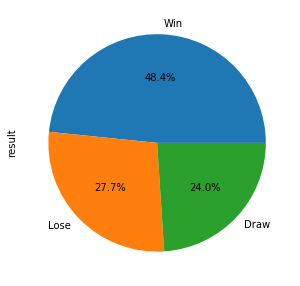

In [233]:
# Pie chart to check the distribution of W,D,L
fifa_df['result'].value_counts().plot(kind='pie', subplots=True, figsize=(10, 5), autopct='%1.1f%%')

From our dataset, there were more wins

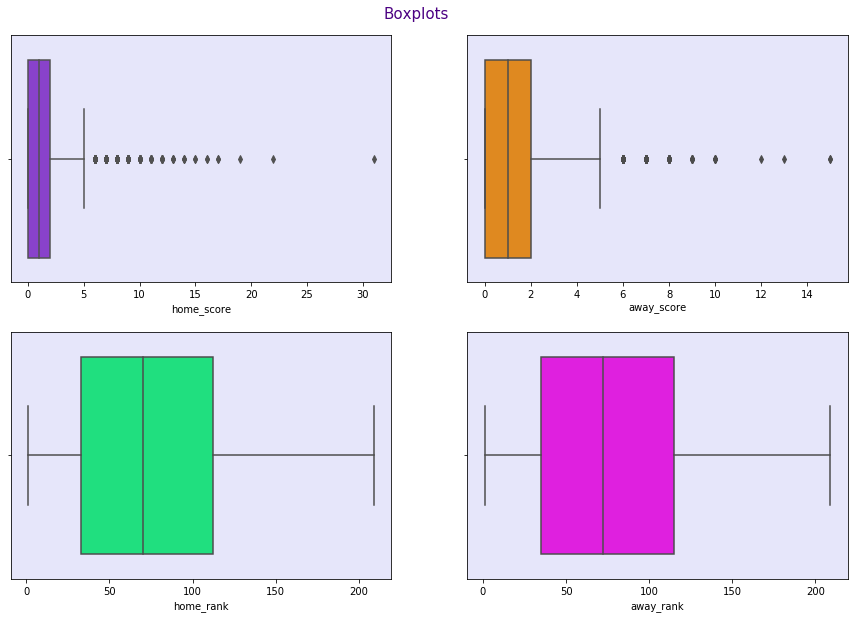

In [234]:
# Ploting the univariate summaries and recording our observations
# Boxplots

# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['home_score', 'away_score', 'home_rank', 'away_rank']
colors = ['blueviolet', 'darkorange', 'springgreen', 'fuchsia']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), fifa_df, col_list, colors):
  sns.boxplot(fifa_df[column], ax = ax, color = color)
  ax.set_facecolor('lavender') # Setting the background color to lavender

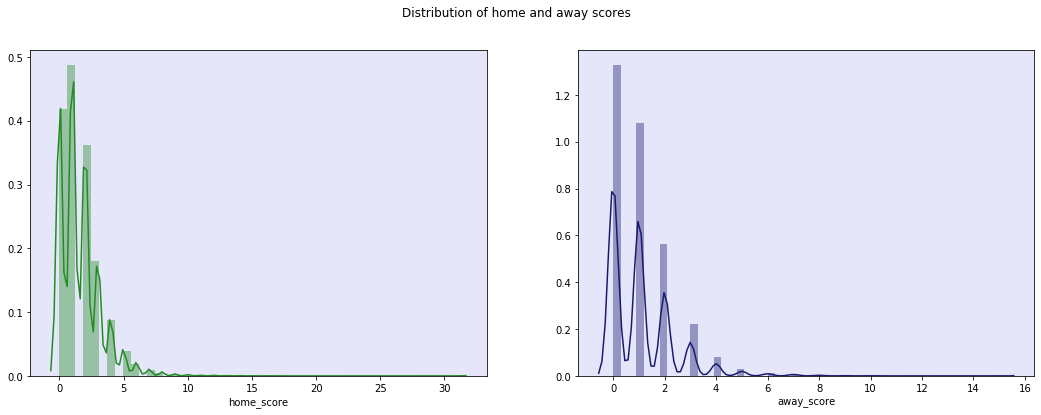

In [235]:
# Using the seaborn library to plot a histogram

# Using displots to plot distribution of home and away scores
#
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
plt.suptitle('Distribution of home and away scores')
for ax, data, column, color in zip(axes.flatten(), fifa_df, ['home_score', 'away_score'], ['forestgreen', 'midnightblue']):
  sns.distplot(fifa_df[column], ax = ax, hist = True, color = color)
  ax.set_facecolor('lavender')

From the above histograms, it can be observed that the plots are skewed to the right, which means that the mean is less than both the median and mode of goals scored

**Bivariate Analysis**

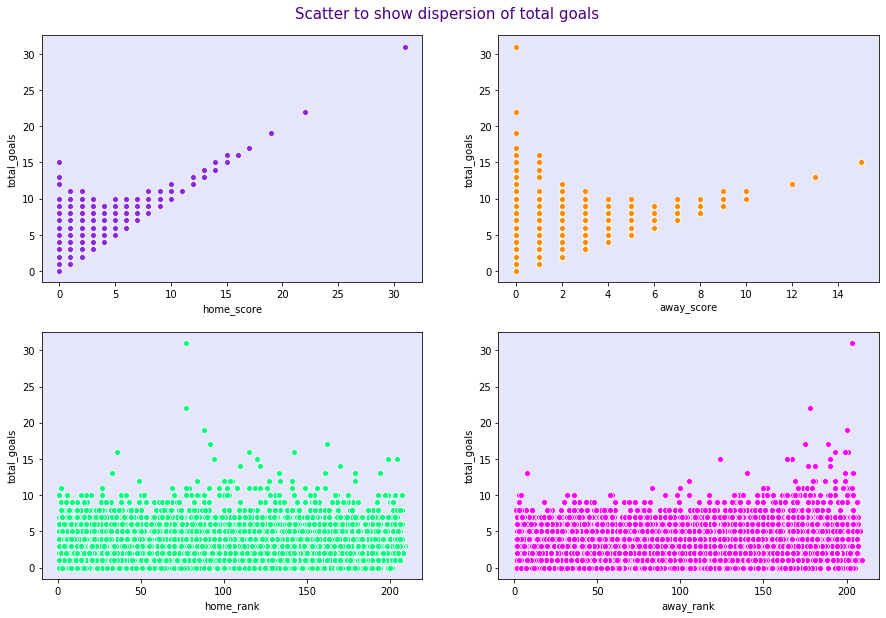

In [236]:
# Scatterplots

# Plotting scatter plots to show dispersion of total goals
# Setting the figure size to 15 by 10
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Scatter to show dispersion of total goals', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), fifa_df, col_list, colors):
  sns.scatterplot(fifa_df[column], fifa_df.total_goals, ax = ax, color = color)

  # Setting the background color
  ax.set_facecolor('lavender')

## 7. Implementing the Solution

### **Approach 1: Using Polynomial regression.**
Create a model that can predict how many goals the home team scores

**1.   Predicting home score**




In [250]:
# Implementing the Solution
# # Selecting columns relevant to the reasearch question
#
fifa1 = fifa_df[['home_team',	'away_team',	'home_score',	'away_score',	'tournament', 'home_rank', 'away_rank']]
fifa1.head()

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank
0,Colombia,Paraguay,0,0,Other,19,67
1,Argentina,Paraguay,0,0,Other,5,67
2,Colombia,Argentina,2,1,Other,19,5
3,Peru,Argentina,0,1,Other,70,5
4,Paraguay,Argentina,1,3,Other,67,5


**Checking for multicollinearity**

**Multicollinearity** happens when one independent variable is highly correlated with one or more of the other independent variables.

In [238]:
# Displaying the correlations between the variables
corrs = fifa1.corr()
corrs

,home_score,away_score,home_rank,away_rank
home_score,1.000000,-0.163729,-0.135415,0.318738
away_score,-0.163729,1.000000,0.221711,-0.179898
home_rank,-0.135415,0.221711,1.000000,0.469472
away_rank,0.318738,-0.179898,0.469472,1.000000


The table above indicates how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. The correlations have been used to compute the VIF (Variance Inflation Factor) score for each variable.The VIF is created by finding the inverse matrix of the correations matrix.

In [239]:
# Creating a dataframe of the VIF
vif = pd.DataFrame(np.linalg.inv(corrs.values), index = corrs.index, columns = corrs.columns)
vif

,home_score,away_score,home_rank,away_rank
home_score,1.259222,-0.008262,0.463670,-0.620529
away_score,-0.008262,1.180140,-0.466493,0.433943
home_rank,0.463670,-0.466493,1.635457,-0.999512
away_rank,-0.620529,0.433943,-0.999512,1.745094


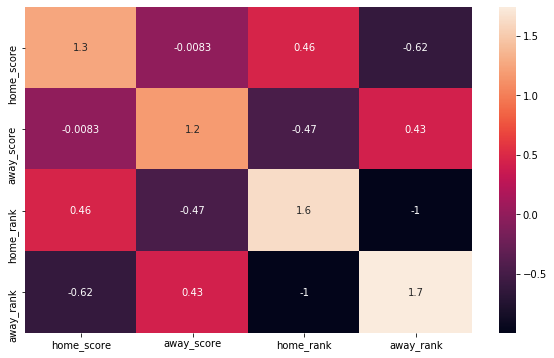

In [240]:
# Creating a heatmap of the vif dataframe
plt.figure(figsize = (10, 6))
sns.heatmap(vif, annot = True)
plt.show()

The VIF score for each variable is found alongside the downwards sloping diagonal. All of this scores are under 5, therefore there is no multicollinearity

**Creating a polynomial model**

In [241]:
# Creating X and y variables
X = fifa1.iloc[:, [0, 1, 3, 4, 5, 6]]
y = fifa1.home_score

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

# Standardising the X_train and the X_test to the same scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.3775841991876048


RMSE Score: 1.378

The lower the RMSE of a model, the better the performance of the model. Therefore, this model is fairly good in making predictions

**Hyperparameter tuning to find the optimal parameters for the model**

In [242]:
# Tuning the parameters of the linear regression model to find the optimal 
# Printing the Linear Regression model parameters that can be tuned
#
from sklearn.linear_model import LinearRegression
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [248]:
# The parameters that can be tuned are fitting the intercept and normalizing
# Creating a parameters dictionary
#
params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
grid_search = GridSearchCV(estimator=regressor, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
print(f'Best score is {grid_search.best_score_}')

Best score is -1.8792141719985664


**Performing cross validation**

In [244]:
# Performing cross validation of ten folds
scores = cross_val_score(regressor, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
print(f'Mean of cross validation scores is {np.round(scores.mean()*-1, 3)}')

# Calculating the variance of the cross validation scores from the mean
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 1.879
Standard deviation of the cross validation scores is 0.257


## **Assessing the heteroscedasticity**

1. **Using a residual plot**

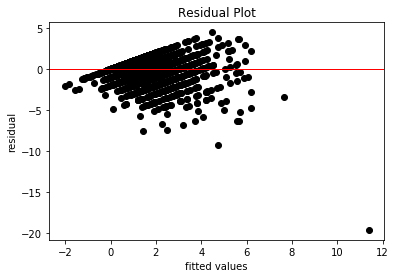

In [245]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

2. **Using Bartlett's Test**

In [246]:
# Performing the barlett's test
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Calculating the critical value of the chi squared distribution, to compare it with the test_result
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

# If the test_result is greater than the critical value, then the null hypothesis is
# rejected. This means that there are patterns to the variance of the data

# Otherwise, if no patterns are identified, null hypothesis is accepted. This means that 
# the variance is homogeneous across the dataset

if (test_result > critical_value):
  print(f'The test result of {np.round(test_result,2)} is greater than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print(f'The test result of {np.round(test_result,2)} is less than the critical value of {np.round(critical_value, 2)}')
  
  print('The variances are homogeneous')

The test result of 476.46 is less than the critical value of inf
The variances are homogeneous


### **Approach 2: Using Logistic Regression.**

Create a model that can predict whether the home team will win, draw or lose

In [251]:
# Selecting the relevant features for the logistic regression model
data = fifa_df[['home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'year', 'home_rank', 'away_rank', 'result']]

# Previewing the first five rows of the data
data.head()

,home_team,away_team,home_score,away_score,tournament,year,home_rank,away_rank,result
0,Colombia,Paraguay,0,0,Other,1993,19,67,Draw
1,Argentina,Paraguay,0,0,Other,1993,5,67,Draw
2,Colombia,Argentina,2,1,Other,1993,19,5,Win
3,Peru,Argentina,0,1,Other,1993,70,5,Lose
4,Paraguay,Argentina,1,3,Other,1993,67,5,Lose


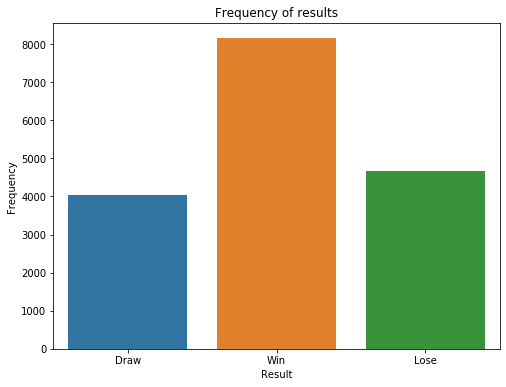

In [252]:
# Checking whether the data is well balanced between all the results; win draw or lose
plt.figure(figsize = (8, 6))
ax = sns.countplot(data.result)
plt.ylabel('Frequency')
plt.xlabel('Result')
plt.title('Frequency of results')
plt.show()

The results are fairly balanced

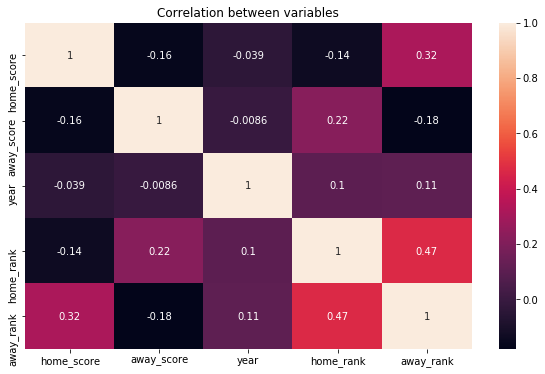

In [253]:
# Checking for correlations between features
#
plt.figure(figsize = (10, 6))
sns.heatmap(data.corr(), annot = True) 
plt.title('Correlation between variables')
plt.show()

**Creating a Logistic Regression model**

In [254]:
# Spliting the data into features and the target variable
X = data.drop('result', axis = 1)
y = data.result

# Encoding the categorical features
X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Instantiating the model and training the model
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Test and Training Scores
score = logistic.score(X_train, y_train)
score2 = logistic.score(X_test, y_test)

print('Training set accuracy: ', '%.3f'%(score))
print('Test set accuracy: ', '%.3f'%(score2))

# Making predictions
y_pred = logistic.predict(X_test)

Training set accuracy:  0.889
Test set accuracy:  0.894


Our model got a 88.9% accuracy on the training set and 89.4% accuracy on the test set.

In [255]:
from sklearn.metrics import confusion_matrix as cm,classification_report as cr,accuracy_score as ac
print(cm(y_pred,y_test))
print(cr(y_pred,y_test))
print(ac(y_pred,y_test))

[[ 818  202   37]
 [  73  918    0]
 [ 133    0 2035]]
              precision    recall  f1-score   support

        Draw       0.80      0.77      0.79      1057
        Lose       0.82      0.93      0.87       991
         Win       0.98      0.94      0.96      2168

    accuracy                           0.89      4216
   macro avg       0.87      0.88      0.87      4216
weighted avg       0.90      0.89      0.90      4216

0.8944497153700189


**Hyperparameter Tuning**

In [256]:
# Displaying parameters of the logistic regression model that can be tuned
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [257]:
# Creating a dictioanry of parameters to be tuned
params = {'C': [1.0, 5.0],
         'penalty': ['l1', 'l2']}

logistic = LogisticRegression()

# Creating a cross validation of 10 folds
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
grid_search = GridSearchCV(estimator=logistic, param_grid = params, cv = kfold, scoring = 'accuracy')

# Fitting the grid search 
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
print(f'Best score is {grid_search.best_score_}')

Best score is 0.8866848997391961


## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [0]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?